# 17. Regression

Seaborn is a great tool if you want to quickly explore data and relations between variables. In addition to just plotting scatterplots you can also perform regression while plotting, a task for which seaborn uses the statsmodels package. **Note that you cannot extract fit values from the plots. The goal here is rather exploratory or to generate figures**. If you need the fit values you will need to use statsmodels directly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diams = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/Ecdat/Diamond.csv')
diams.head(5)

,Unnamed: 0,carat,colour,clarity,certification,price
0,1,0.30,D,VS2,GIA,1302
1,2,0.30,E,VS1,GIA,1510
2,3,0.30,G,VVS1,GIA,1510
3,4,0.30,G,VS1,GIA,1260
4,5,0.31,D,VS1,GIA,1641


## ```lmplot``` and ```regplot```

The two functions are very similar in that they allow you to compute a fit and plot it. The main difference is the input. ```lmplot``` requires a DataFrame as ```data``` input while ```regplot``` is more flexible. In the frame of this course we focus on ```lmplot```.

The idea is that you pass a DataFrame to the function and specify ```y``` and ```x``` variables to fit as ```y~x```. By default the fit is linear:

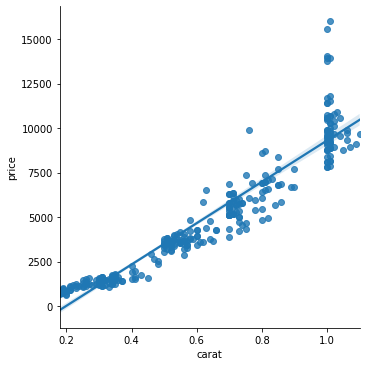

In [2]:
sns.lmplot(data=diams, x='carat', y='price');

As output you get a scatter plot with the linear plot and a band indicating 95% confidence interval. As usual, there's little you cannot adjust both in terms of computation and formatting. For exmaple you can adjust the confidence interval with ```ci``` and use any option of matplotlib's scatter plot with ```scatter_kws```:

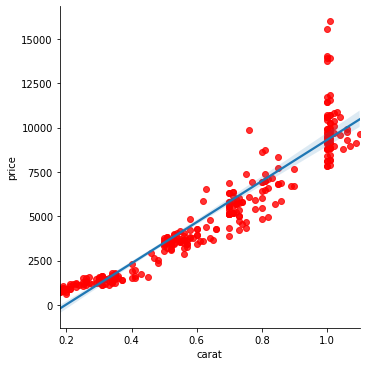

In [3]:
sns.lmplot(data=diams, x='carat', y='price', ci=99, scatter_kws={'color':'red'});

## Using aesthetics

As with all other plots, you can still use aesthetics which will naturally split the data in categories and generate a fit for each of them:

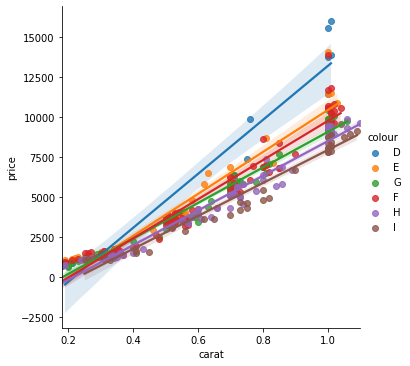

In [4]:
sns.lmplot(data=diams, x='carat', y='price', hue='colour');

If you want to separate your plots you can also use the ```col``` argument. Instead of assigning a color to each subset, seaborn just create one subplot per subset:

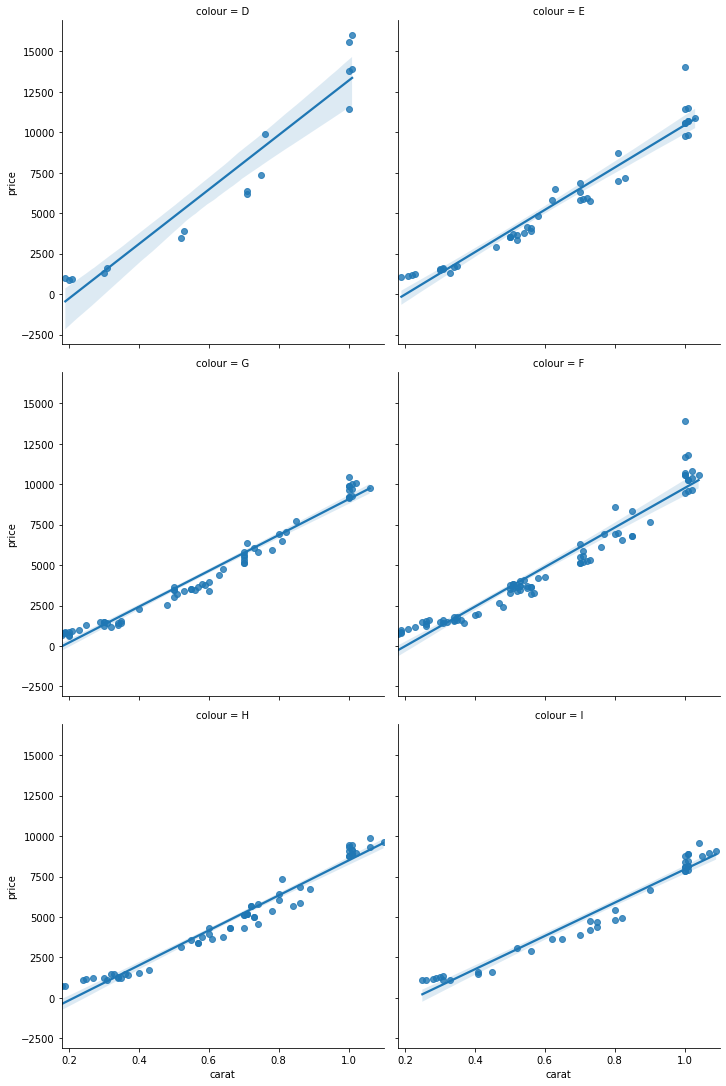

In [5]:
sns.lmplot(data=diams, x='carat', y='price', col='colour', col_wrap=2);

## Other fits

You are not restricted to perform a linear fit. You can also use polynomials. For that you have to specify the ```order``` of the polynomial. For example to fit a parabola:

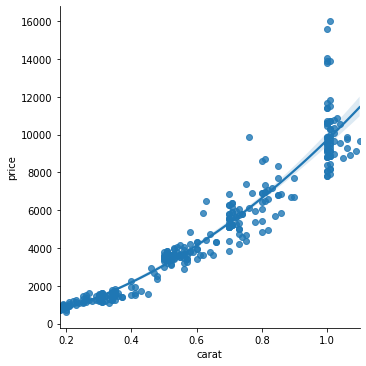

In [6]:
sns.lmplot(data=diams, x='carat', y='price', order=2);

You can also use a lowess model (locally weighted scatterplot smoothing) if your data don't fit a simpler model:

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


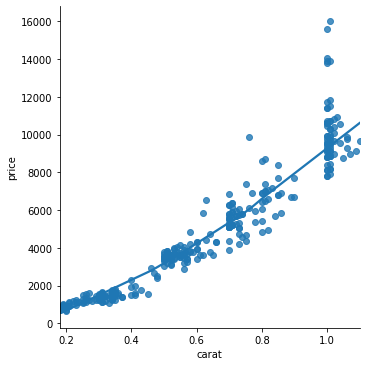

In [7]:
sns.lmplot(data=diams, x='carat', y='price', lowess=True);

## Residuals

Whenver you do a fit of the data, it's a good idea to check the residuals, i.e. the difference between actual and predicted data, which ideally should be distributed around 0. Seaborn has a specific function for that called ```residplot```. For our quadratic fit above we would use the same options, only the output is different:

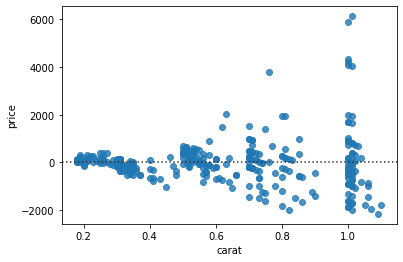

In [10]:
sns.residplot(data=diams, x='carat', y='price', order=2);

## Exercise

Try to fit a linear regression to the ```bill_depth_mm``` vs ```bill_length_mm``` data. Does the result make sense ? If not, how can you easily fix this?